In [22]:
from onnxruntime import InferenceSession
from src.data.sets.super_resolution import FastMRISuperResolutionDataset
import numpy as np
import matplotlib.pyplot as plt

data_path = '/Volumes/T7_KAPTIOS/datasets/fastMRI/knee/singlecoil_val/'

dataset = FastMRISuperResolutionDataset(data_path)
non_quantized_session = InferenceSession('./exports/model.onnx')
quantized_session = InferenceSession('./exports/model_quantized.onnx')

In [26]:
idx = 10
sample = dataset[idx]
x, y = sample.image.numpy(), sample.target.numpy()
x = np.expand_dims(x, axis=0)

## Non-Quantized

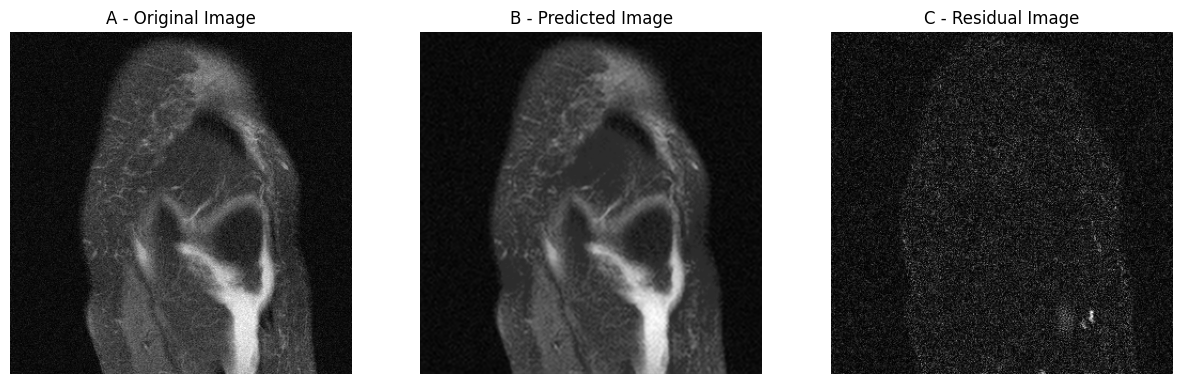

In [29]:
input_name = non_quantized_session.get_inputs()[0].name
output_name = non_quantized_session.get_outputs()[0].name
non_quantized_output = non_quantized_session.run([output_name], {input_name: x})[0]

A = non_quantized_output[0][0]
B = y[0]

fig, axs = plt.subplots(1, 3)

fig.set_size_inches((15, 5))

axs[0].imshow(B, cmap='gray')
axs[0].set_title('A - Original Image')
axs[0].axis('off')
axs[1].imshow(A, cmap='gray')
axs[1].set_title('B - Predicted Image')
axs[1].axis('off')
axs[2].imshow(np.abs(A - B), cmap='gray')
axs[2].set_title('C - Residual Image')
axs[2].axis('off')

plt.show()

## Quantized

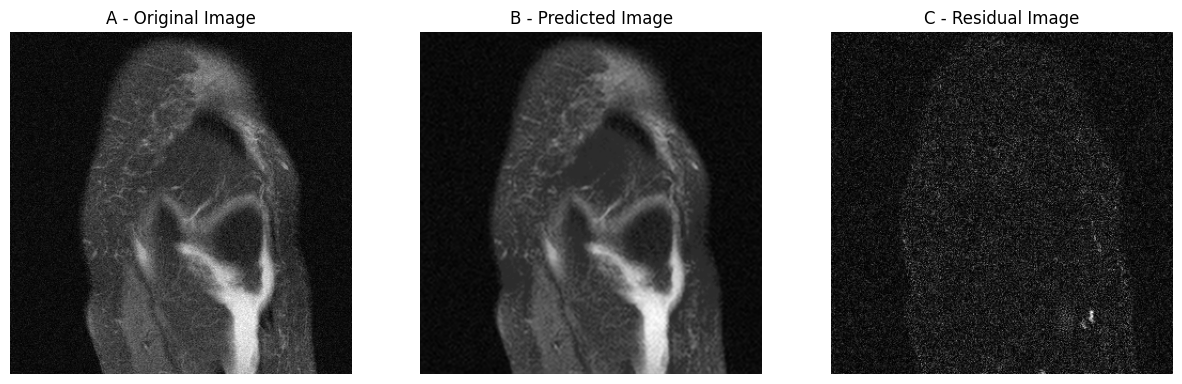

In [30]:
input_name = quantized_session.get_inputs()[0].name
output_name = quantized_session.get_outputs()[0].name
quantized_output = quantized_session.run([output_name], {input_name: x})[0]

A = quantized_output[0][0]
B = y[0]

fig, axs = plt.subplots(1, 3)

fig.set_size_inches((15, 5))

axs[0].imshow(B, cmap='gray')
axs[0].set_title('A - Original Image')
axs[0].axis('off')
axs[1].imshow(A, cmap='gray')
axs[1].set_title('B - Predicted Image')
axs[1].axis('off')
axs[2].imshow(np.abs(A - B), cmap='gray')
axs[2].set_title('C - Residual Image')
axs[2].axis('off')

plt.show()

In [44]:
from src.optimisation.losses import SobelFilter
import torch
from torch import nn

x = torch.Tensor(B)
laplace = SobelFilter()
result = laplace(x.unsqueeze(0).unsqueeze(1))

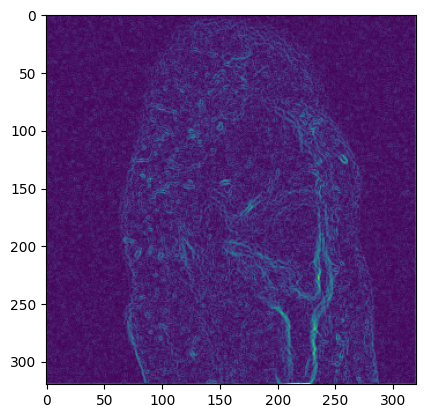

In [45]:
plt.imshow(result[0][0])